### <span style="color: blue;">Imports and settings</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Business Understanding

The aim of this analysis is to look into Airbnb market in Seattle and Boston. In particular to answer fallowing questions:

Question 1:

In which city: Seattle or Boston, is renting an apartment with Airbnb more expensive?
Are there any dependencies in rental price in relation to the distance from city center?

To answer this question we need to focus on listing prices in respect to their geographical location

Question 2:

What are the busiest seasons to visit Seattle vs Boston?

By busiest seasons we can understand seasons when the most apartments is occupied.

Question 3:

What are the most expensive seasons to visit Seattle vs Boston?

Prices of listings change throughout the year. We need to calculate how this prices fluctuate.

# Data Understanding

### <span style="color: blue;">Loading datasets</span>

In [3]:
# Seattle
seattle_calendar = pd.read_csv('Data_Seattle/calendar.csv')
seattle_listings = pd.read_csv('Data_Seattle/listings.csv')
seattle_reviews = pd.read_csv('Data_Seattle/reviews.csv')

#Boston
boston_calendar = pd.read_csv('Data_Boston/calendar.csv')
boston_listings = pd.read_csv('Data_Boston/listings.csv')
boston_reviews = pd.read_csv('Data_Boston/reviews.csv')

### <span style="color: blue;">Exploration of datasets</span>

#### <span style="color: brown;">Calendar dataset</span>

In [5]:
seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
boston_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [7]:
seattle_calendar.shape

(1393570, 4)

In [8]:
seattle_calendar['listing_id'].nunique()

3818

In [9]:
seattle_calendar_one = seattle_calendar[seattle_calendar['listing_id'] == 953595].sort_values(by=['date'])
seattle_calendar_one

,listing_id,date,available,price
365,953595,2016-01-04,t,$125.00
366,953595,2016-01-05,t,$125.00
367,953595,2016-01-06,f,NaN
368,953595,2016-01-07,f,NaN
369,953595,2016-01-08,f,NaN
370,953595,2016-01-09,t,$125.00
371,953595,2016-01-10,t,$125.00
372,953595,2016-01-11,t,$125.00
373,953595,2016-01-12,t,$125.00
374,953595,2016-01-13,t,$125.00


#### <span style="color: green;">Checking number of empty values</span>

In [16]:
seattle_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [17]:
boston_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         665853
dtype: int64

#### <span style="color: brown;">Listings  dataset</span>

In [22]:
seattle_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [11]:
seattle_listings.shape

(3818, 92)

In [12]:
boston_listings.shape

(3585, 95)

In [13]:
seattle_listings['id'].nunique()

3818

In [14]:
seattle_listings['square_feet'].isna().sum()

3721

#### <span style="color: green;">Checking number of empty values for columns we want to use</span>

In [23]:
seattle_listings[['id', 'latitude', 'longitude', 'price', 'guests_included']].isnull().sum()

id                 0
latitude           0
longitude          0
price              0
guests_included    0
dtype: int64

In [24]:
boston_listings[['id', 'latitude', 'longitude', 'price', 'guests_included']].isnull().sum()

id                 0
latitude           0
longitude          0
price              0
guests_included    0
dtype: int64

In [ ]:
# No empty values for columns we want to use 

#### <span style="color: brown;">Reviews  dataset</span>

In [15]:
seattle_reviews.head(100)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
5,7202016,43979139,2015-08-23,1154501,Barent,"Kelly was great, place was great, just what I ..."
6,7202016,45265631,2015-09-01,37853266,Kevin,Kelly was great! Very nice and the neighborhoo...
7,7202016,46749120,2015-09-13,24445447,Rick,hola all bnb erz - Just left Seattle where I h...
8,7202016,47783346,2015-09-21,249583,Todd,Kelly's place is conveniently located on a qui...
9,7202016,48388999,2015-09-26,38110731,Tatiana,"The place was really nice, clean, and the most..."


# Question 1: Seattle vs Boston price comparison

In [17]:
# Function for calculation of distances in km based on coordinates

def haversine(lat1, lon1, lat2, lon2, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

## Data preparation

In [18]:
# Function for data preparation for price comparison chart

def data_preparation(listings, city_centre_coordinates):
    # Creating copy dataframe only with columns we need
    df_listings = listings[['id', 'latitude', 'longitude', 'price', 'guests_included']].copy()
    # Converting price to numerical value - getting rid of $ sumbol
    df_listings['price'] = df_listings['price'].replace('[\$\,]', '', regex=True).astype(float).round(1)
    # Calculating latitude and longitude in radians
    df_listings['LAT_rad'], df_listings['LON_rad'] = np.radians(df_listings['latitude']), np.radians(df_listings['longitude'])
    # Calculating distance to city center
    df_listings['dist'] = haversine(df_listings.LAT_rad, df_listings.LON_rad,
                 city_centre_coordinates[0], city_centre_coordinates[1])
    
    # Creating bins for distances
    # List of conditions
    conditions = [
          (df_listings['dist'] > 0.0) & (df_listings['dist'] < 1.0)
        , (df_listings['dist'] >= 1.0) & (df_listings['dist'] < 3.0)
        , (df_listings['dist'] >= 3.0) & (df_listings['dist'] < 5.0)
        , (df_listings['dist'] >= 5.0) & (df_listings['dist'] < 10.0)
        , (df_listings['dist'] >= 10.0) 
    ]
    # List of values to return
    choices  = [
          "0-1"
        , "1-3"
        , "3-5"
        , "5-10"
        , ">10"
    ]
    # create a new column in the DF based on the conditions
    df_listings["dist_bin"] = np.select(conditions, choices)
    # Grouping by dist bin
    df_grouped = df_listings[['dist_bin', 'price', 'guests_included']].groupby(['dist_bin']).sum().reset_index()
    #Calculating average price per guest
    df_grouped['average_price_per_guest'] = df_grouped.price / df_grouped.guests_included
    
    return df_grouped[['dist_bin', 'average_price_per_guest']]

In [19]:
# Coordinates for city centers

seattle_city_centre = [np.radians(47.608013),np.radians(-122.335167)]
boston_city_centre = [np.radians(42.361145),np.radians(-71.057083)]

## Analyze

In [20]:
seattle_prices = data_preparation(seattle_listings, seattle_city_centre)

In [21]:
seattle_prices.head(100)

,dist_bin,average_price_per_guest
0,0-1,102.234714
1,1-3,86.256127
2,3-5,80.348901
3,5-10,67.861749
4,>10,55.094092


In [22]:
boston_prices = data_preparation(boston_listings, boston_city_centre)

In [23]:
boston_prices.head(100)

,dist_bin,average_price_per_guest
0,0-1,139.062290
1,1-3,155.981439
2,3-5,129.660302
3,5-10,79.945055
4,>10,68.840000


## Visualise

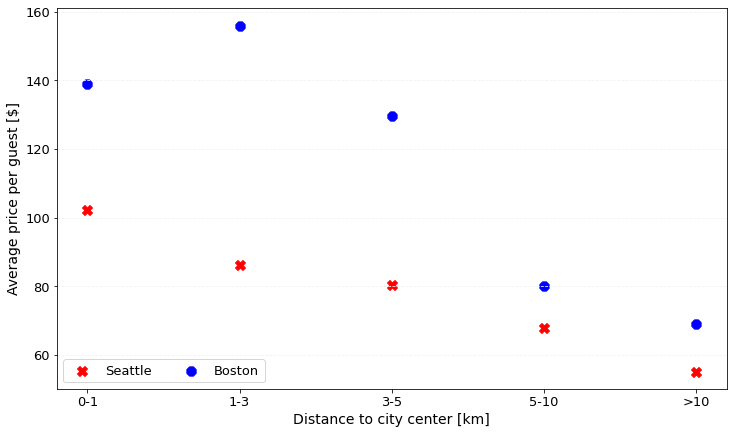

In [40]:
# Plotting the results

plt.figure(figsize=(12,7))
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

seattle_plot = plt.scatter(seattle_prices.dist_bin, seattle_prices.average_price_per_guest, color='r', s=100, marker='X') 
boston_plot = plt.scatter(boston_prices.dist_bin, boston_prices.average_price_per_guest, color='b', s=100, marker = '8') 

plt.legend((seattle_plot, boston_plot),
           ('Seattle', 'Boston'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=13)

plt.grid(axis='y', color='0.95', linestyle='--')

plt.xlabel("Distance to city center [km]")
plt.ylabel("Average price per guest [$]")

#plt.title('Average price per guest in respect to distance to city center')

plt.show()

## Explanation of the visualisation

We can clearly see that prices in Boston are higher for each group.

Additionaly prices tend to be higher closer to city centre, although there are some exeptions (Boston points 0-1 and 1-3)

# Question 2: The busiest seasons

## Data preparation and visualization

In [48]:
# Function for plotting seasonality chart

def plot_seasonality(city_calendar_df, color='r'):
    # We create a copy to avoid modifying original dataframe
    city_calendar = city_calendar_df.copy()
    # Converting available column to numerical - 1 for available and 0 for not available 
    city_calendar['available'] = city_calendar['available'].map({'t': 1, 'f': 0}) 
    # Grouping by day and summing number of available listings
    city_calendar_grouped = city_calendar[['date', 'available']].groupby(['date']).sum().reset_index()
    # Calculating number of listings value, we need this to calculate percentage of listings available  
    number_of_listings = city_calendar['listing_id'].nunique()
    # Calculating percentage of listings available 
    city_calendar_grouped['percentage_of_listings_available'] = 100 * city_calendar_grouped.available / number_of_listings
    # Adding months columns 
    city_calendar_grouped['month_no'] = pd.to_datetime(city_calendar_grouped.date).dt.month
    city_calendar_grouped['month'] = pd.to_datetime(city_calendar_grouped.date).dt.month_name()
    
    #Grouping by month
    city_calendar_grouped_by_month = (
        city_calendar_grouped[['month', 'month_no', 'percentage_of_listings_available']].groupby(['month', 'month_no']).
        mean(). 
        reset_index().
        sort_values(by=['month_no']))
    
    # Plotting the results 
    sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
    plt.rc('axes', titlesize=18)     # fontsize of the axes title
    plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
    plt.rc('legend', fontsize=13)    # legend fontsize
    plt.rc('font', size=13)          # controls default text sizes
    plt.figure(figsize=(14,6), tight_layout=True)
    #plotting
    plt.plot(city_calendar_grouped_by_month.month, city_calendar_grouped_by_month.percentage_of_listings_available, 'o-', linewidth=2, color=color)
    #customization
    #plt.xlabel('Month')
    plt.ylabel('Averaged percenatge of available listings')
    #plt.title('Title')
    plt.show()

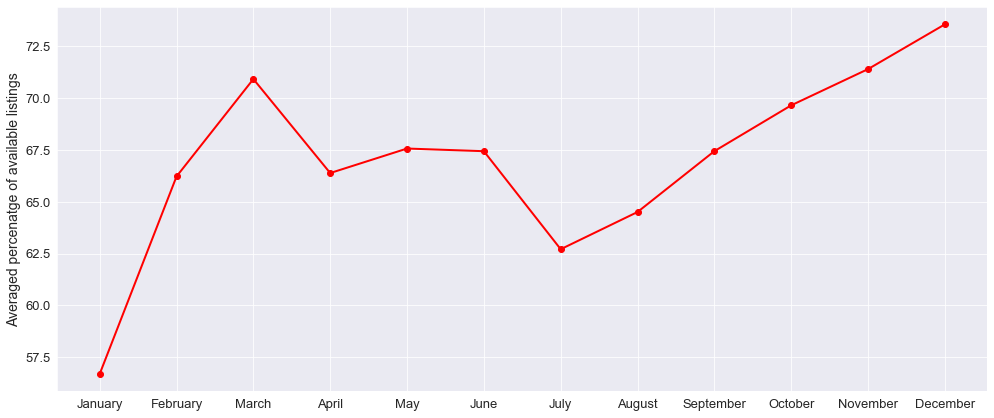

In [49]:
# Plotting seasonality for Seattle
plot_seasonality(seattle_calendar, color='r')

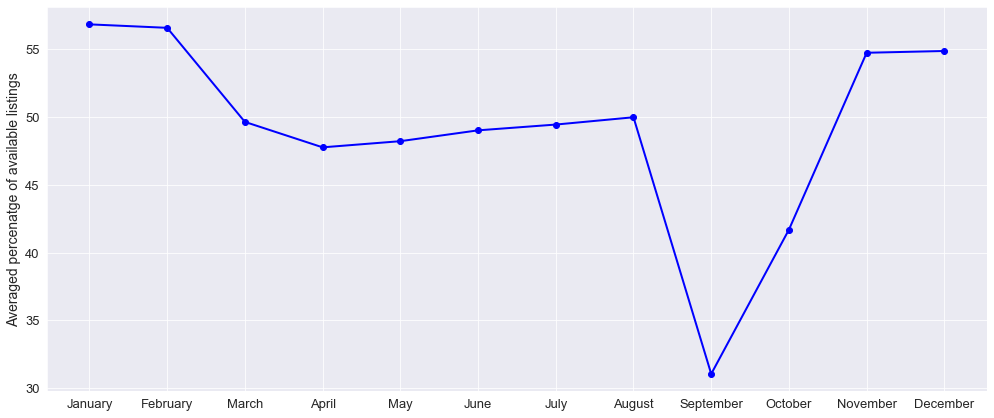

In [50]:
# Plotting seasonality for Boston
plot_seasonality(boston_calendar, color = 'b')

## Explanation of the visualisation

Based on above visualizations we can see that the busiest months in Seattle are January and July, for Boston September and October.

# Question 3: The most expensive seasons 

## Data preparation and visualization

Note: Calendar prices we use here have a lot of null values. To get rid of them we use forward and backward fill method. 
This method was applied as prices tend to be similar next to each other, so expanding the nearest value to the missing ones is a good estimation.

In [51]:
def plot_seasonality_of_prices(city_calendar_df, color='r'):
    # We create a copy to avoid modifying original dataframe
    city_calendar = city_calendar_df.copy()
    # Converting price to numerical value - getting rid of $ sumbol
    city_calendar['price'] = city_calendar['price'].replace('[\$\,]', '', regex=True).astype(float).round(1)
    # We apply forward and backwards fill to get rid of empty values
    city_calendar['price_ff_bf'] = city_calendar.sort_values('date').groupby('listing_id')['price'].fillna(method='ffill').fillna(method='bfill')
    # Calculating mean 
    city_calendar['price_mean'] = city_calendar.groupby('listing_id')['price_ff_bf'].transform('mean')
    # Calculating relative price
    city_calendar['price_relative'] = city_calendar['price_ff_bf'] / city_calendar['price_mean']
    # Adding month columns 
    city_calendar['month_no'] = pd.to_datetime(city_calendar.date).dt.month
    city_calendar['month'] = pd.to_datetime(city_calendar.date).dt.month_name()
    
    #Grouping by month
    city_calendar_grouped_by_month = (
        city_calendar[['month', 'month_no', 'price_relative']].groupby(['month', 'month_no']).
        mean(). 
        reset_index().
        sort_values(by=['month_no']))
    
    #Plotting the results
    sns.set_style('whitegrid') # darkgrid, white grid, dark, white and ticks
    plt.rc('axes', titlesize=18)     # fontsize of the axes title
    plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
    plt.rc('legend', fontsize=13)    # legend fontsize
    plt.rc('font', size=13)          # controls default text sizes
    plt.figure(figsize=(14,6), tight_layout=True)
    #plotting
    plt.plot(city_calendar_grouped_by_month.month, city_calendar_grouped_by_month.price_relative, 'o-', linewidth=2, color=color)
    #customization
    #plt.xlabel('Month')
    plt.ylabel('Relative price averaged')
    #plt.title('Title')
    plt.show()

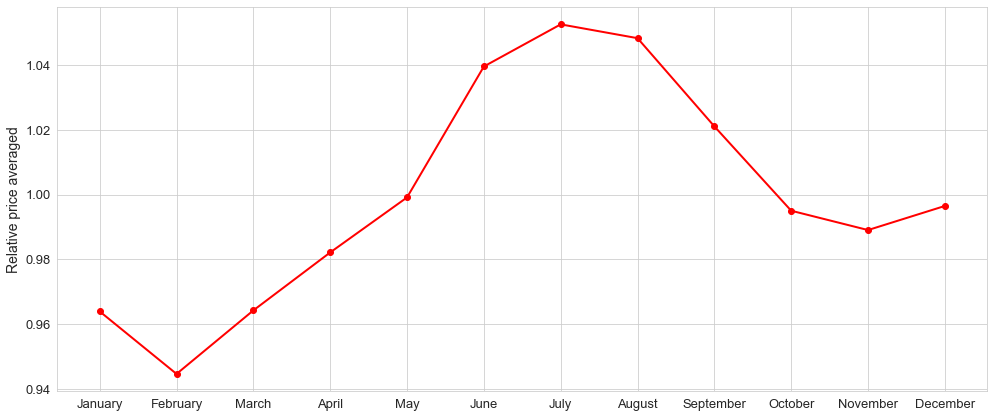

In [52]:
# Plotting seasonality of prices for Seattle
plot_seasonality_of_prices(seattle_calendar, color='r')

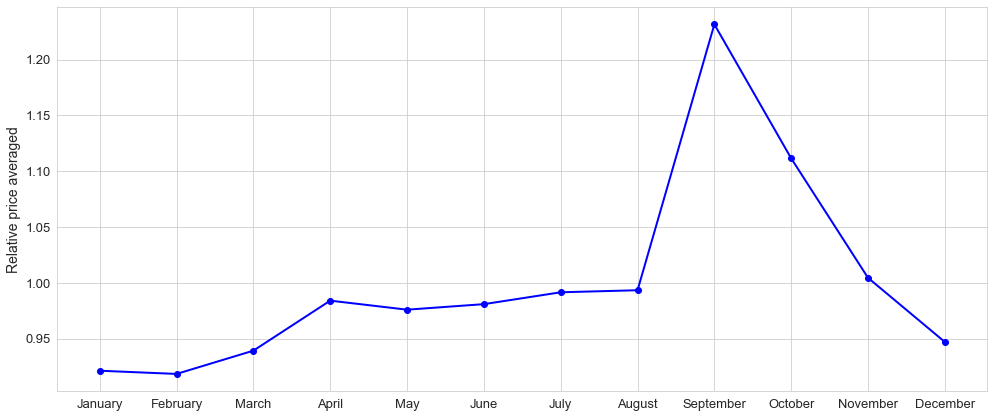

In [53]:
# Plotting seasonality of prices for Boston
plot_seasonality_of_prices(boston_calendar, color='b')

## Explanation of the visualisation

Based on above visualizations we can see that the most expensive months in Seattle are summer months: June, July and August. For Boston September and October.